


# phase 1

First 5 rows of the data:
   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73   

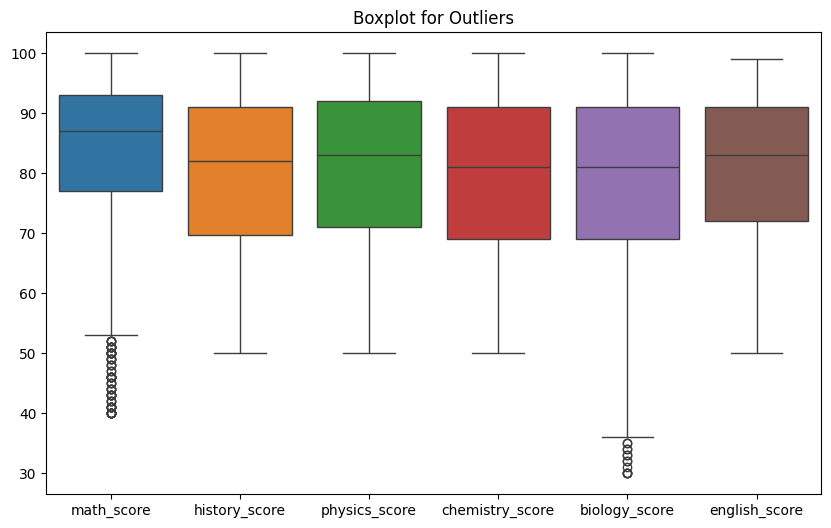


Descriptive statistics after removing outliers:
                id  absence_days  weekly_self_study_hours   math_score  \
count  1625.000000   1625.000000              1625.000000  1625.000000   
mean   1001.888615      3.731077                17.128615    82.694154   
std     574.895917      2.671861                11.877249    13.169579   
min       1.000000      0.000000                 0.000000    40.000000   
25%     508.000000      2.000000                 5.000000    76.000000   
50%    1004.000000      3.000000                17.000000    86.000000   
75%    1492.000000      5.000000                27.000000    93.000000   
max    2000.000000     10.000000                50.000000    99.000000   

       history_score  physics_score  chemistry_score  biology_score  \
count    1625.000000    1625.000000      1625.000000    1625.000000   
mean       79.462769      80.467692        78.696000      78.619692   
std        12.563435      12.276839        12.354419      13.340533   


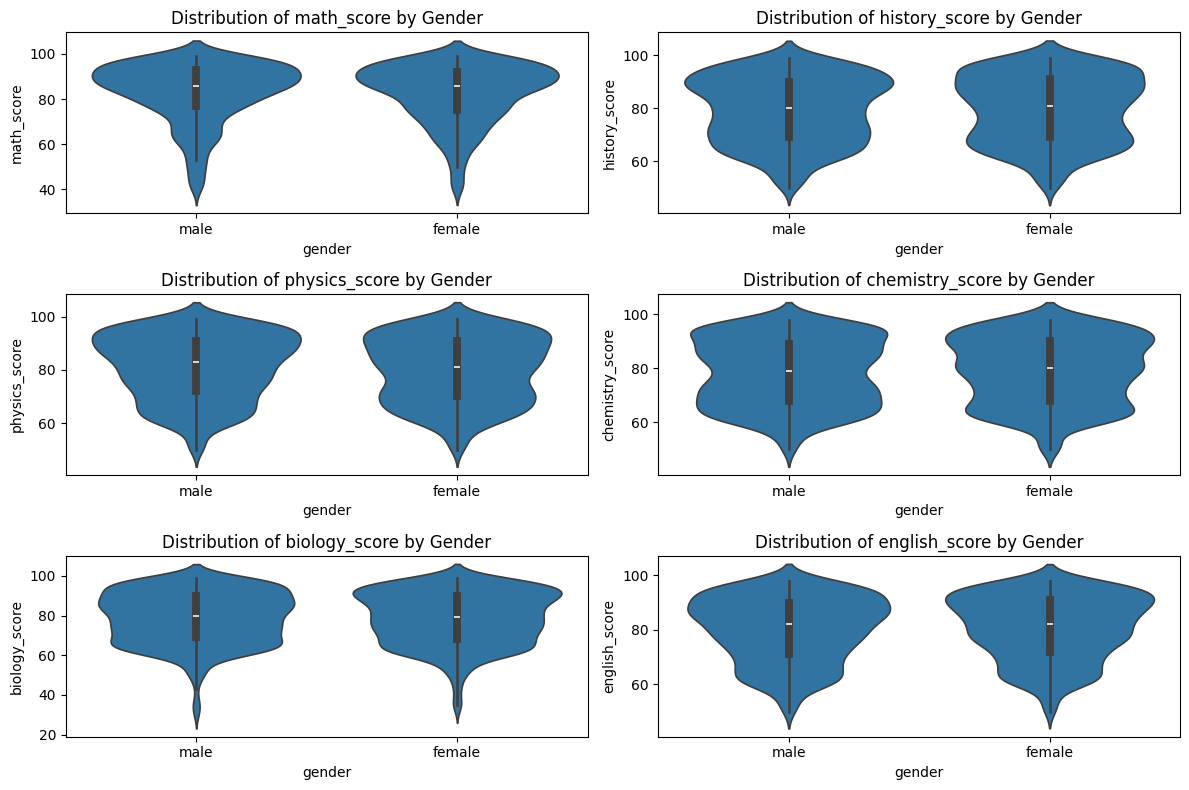

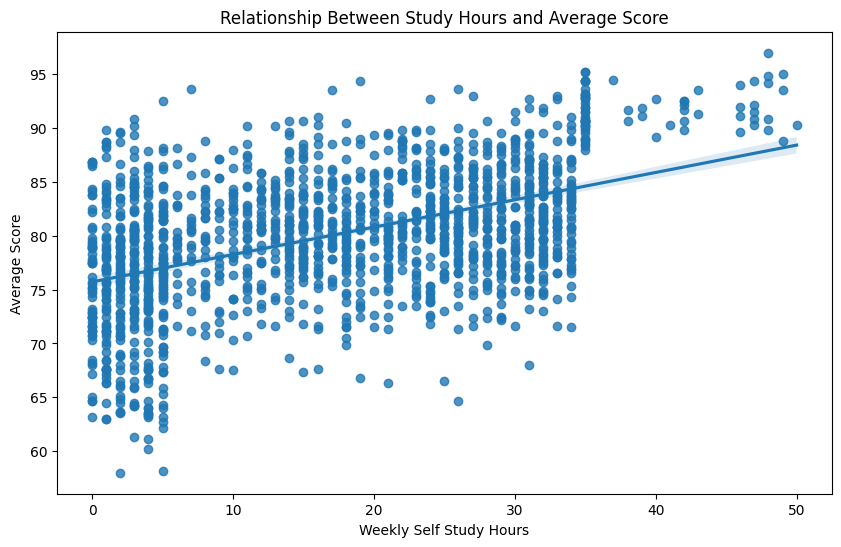

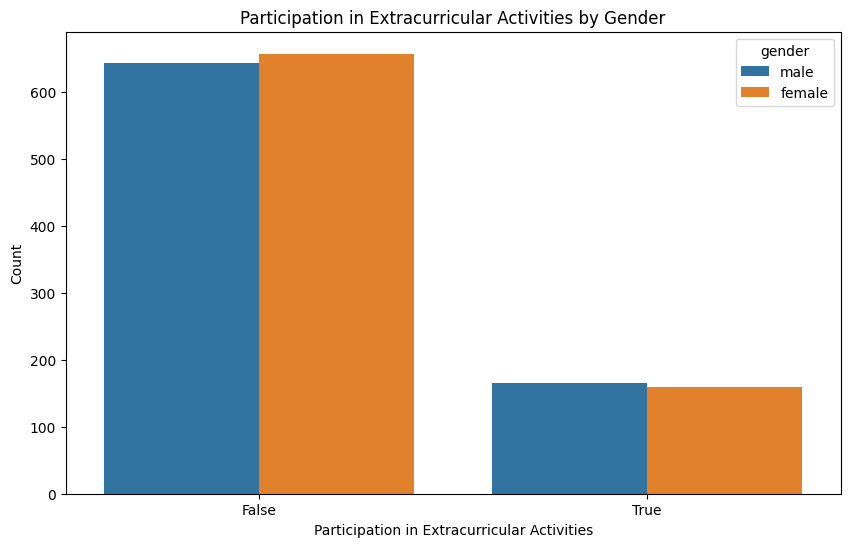


Students with high scores:
        id first_name  last_name                                    email  \
0        1       Paul      Casey           paul.casey.1@gslingacademy.com   
2        3       Tina    Andrews         tina.andrews.3@gslingacademy.com   
6        7    Anthony      Smith        anthony.smith.7@gslingacademy.com   
7        8     George      Short         george.short.8@gslingacademy.com   
8        9    Stanley  Gutierrez    stanley.gutierrez.9@gslingacademy.com   
...    ...        ...        ...                                      ...   
1991  1992  Charlotte       Rowe    charlotte.rowe.1992@gslingacademy.com   
1993  1994      Shawn      Ochoa       shawn.ochoa.1994@gslingacademy.com   
1997  1998    Madison      Cross     madison.cross.1998@gslingacademy.com   
1998  1999   Brittany    Compton  brittany.compton.1999@gslingacademy.com   
1999  2000    Natalie      Smith     natalie.smith.2000@gslingacademy.com   

      gender  part_time_job  absence_days  extr

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "student-scores.csv"
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print("The file is not found. Please check the file name or path.")
    raise

# 1. Verify columns
required_columns = ['weekly_self_study_hours', 'math_score', 'history_score',
                    'physics_score', 'chemistry_score', 'biology_score',
                    'english_score', 'gender', 'absence_days', 'extracurricular_activities']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"The following columns are missing from the data: {missing_columns}")
    raise ValueError("Ensure that the data contains all required columns.")

# 2. Explore the data
print("First 5 rows of the data:")
print(data.head())

print("\nGeneral information about the data:")
print(data.info())

print("\nDescriptive statistics for numerical data:")
print(data.describe())

# 3. Clean the data
# Handle missing values
print("\nMissing values before cleaning:")
print(data.isnull().sum())

# Fill missing values with the median (for study hours and scores)
data['weekly_self_study_hours'] = data['weekly_self_study_hours'].fillna(data['weekly_self_study_hours'].median())
numeric_columns = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score']
for column in numeric_columns:
    data[column] = data[column].fillna(data[column].median())

# Fill missing values in extracurricular activities
if 'extracurricular_activities' in data.columns:
    data['extracurricular_activities'] = data['extracurricular_activities'].fillna(False)

print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Remove duplicate values
print("\nNumber of duplicate rows before removal:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate rows after removal:", data.duplicated().sum())

# 3. Handling outliers
# Display outliers using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title("Boxplot for Outliers")
plt.show()

# Remove outliers in scores (greater than 95%)
for column in numeric_columns:
    threshold = data[column].quantile(0.95)
    data = data[data[column] <= threshold]

print("\nDescriptive statistics after removing outliers:")
print(data.describe())

# 4. Exploratory Data Analysis (EDA)
# Distribution of subject scores using Violin Plot
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(data=data, x='gender', y=column)
    plt.title(f"Distribution of {column} by Gender")
plt.tight_layout()
plt.show()

# Relationship between study hours and scores using Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x=data['weekly_self_study_hours'], y=data[numeric_columns].mean(axis=1))
plt.title("Relationship Between Study Hours and Average Score")
plt.xlabel("Weekly Self Study Hours")
plt.ylabel("Average Score")
plt.show()

# Analysis of extracurricular activities using Count Plot
if 'extracurricular_activities' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='extracurricular_activities', hue='gender')
    plt.title("Participation in Extracurricular Activities by Gender")
    plt.xlabel("Participation in Extracurricular Activities")
    plt.ylabel("Count")
    plt.show()

# 5. Data modification
# Add a new column for the average score
data['average_score'] = data[numeric_columns].mean(axis=1)

# Extract students with an average score above 80
high_achievers = data[data['average_score'] > 80]

print("\nStudents with high scores:")
print(high_achievers)

# Use Pandas to filter data based on specific conditions
# Example of filtering students who have a math score above 70 and participate in extracurricular activities
filtered_data = data[(data['math_score'] > 70) & (data['extracurricular_activities'] == True)]

print("\nStudents who have math scores above 70 and participate in extracurricular activities:")
print(filtered_data)

# 6. Save the modified data
data.to_csv("cleaned_student_scores.csv", index=False)
print("\nThe modified data has been saved as 'cleaned_student_scores.csv'")


# phase 2

In [3]:
# Import libraries
import numpy as np
import pandas as pd

# Load the data from the previous phase
file_path = "cleaned_student_scores.csv"
data = pd.read_csv(file_path)

# Convert the numerical data to a NumPy Array to improve performance
numeric_columns = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score']
data_array = data[numeric_columns].to_numpy()

# 1. Vectorized Operations and Performance Optimization
# Calculate the total score of each student
student_total_scores = np.sum(data_array, axis=1)
data['total_score'] = student_total_scores

# Calculate the average score for each subject
subject_mean_scores = np.mean(data_array, axis=0)
print("Average score for each subject:", subject_mean_scores)

# Add total and average scores as new columns
data['mean_score'] = np.mean(data_array, axis=1)
data['variance_score'] = np.var(data_array, axis=1)

# 2. Calculate Statistical Measures
# Median for each subject
subject_median_scores = np.median(data_array, axis=0)
print("Median for each subject:", subject_median_scores)

# Variance and standard deviation for each subject
subject_variance = np.var(data_array, axis=0)
subject_std_dev = np.std(data_array, axis=0)
print("Variance for each subject:", subject_variance)
print("Standard deviation for each subject:", subject_std_dev)

# Correlation Matrix between subjects
correlation_matrix = np.corrcoef(data_array, rowvar=False)
print("\nCorrelation Matrix between subjects:")
print(correlation_matrix)

# 3. Perform Custom Algorithms on Matrices
# Matrix multiplication of the scores matrix by itself
squared_scores_matrix = np.dot(data_array.T, data_array)
print("\nMatrix of squared scores:")
print(squared_scores_matrix)

# Inverse of the correlation matrix (if invertible)
try:
    inverse_correlation = np.linalg.inv(correlation_matrix)
    print("\nInverse of the correlation matrix:")
    print(inverse_correlation)
except np.linalg.LinAlgError:
    print("\nThe correlation matrix is not invertible.")

# Save the modified data
output_path = "phase2_results.csv"
data.to_csv(output_path, index=False)
print(f"\nThe modified data has been saved in '{output_path}'")


Average score for each subject: [82.69415385 79.46276923 80.46769231 78.696      78.61969231 80.50030769]
Median for each subject: [86. 81. 82. 80. 80. 82.]
Variance for each subject: [173.33107351 157.74276772 150.62803314 152.53773785 177.86028914
 139.23953837]
Standard deviation for each subject: [13.16552595 12.55956877 12.27306128 12.3506169  13.33642715 11.79998044]

Correlation Matrix between subjects:
[[1.         0.13695985 0.10895184 0.14066561 0.07877838 0.13152642]
 [0.13695985 1.         0.02703278 0.10552973 0.08916289 0.15123062]
 [0.10895184 0.02703278 1.         0.10076044 0.1148818  0.0380723 ]
 [0.14066561 0.10552973 0.10076044 1.         0.1065391  0.05452667]
 [0.07877838 0.08916289 0.1148818  0.1065391  1.         0.05665132]
 [0.13152642 0.15123062 0.0380723  0.05452667 0.05665132 1.        ]]

Matrix of squared scores:
[[11393938 10714849 10841695 10612179 10587234 10850674]
 [10714849 10517121 10397323 10188379 10176194 10431184]
 [10841695 10397323 10766726 1

# phase 3

Training data percentage: 80.00%
Testing data percentage: 20.00%

Random Forest Model Evaluation:
Accuracy: 0.90
Precision: 0.94
Recall: 0.88

Classification Report:
                  precision    recall  f1-score   support

 Low Performance       0.86      0.93      0.90       147
High Performance       0.94      0.88      0.91       178

        accuracy                           0.90       325
       macro avg       0.90      0.90      0.90       325
    weighted avg       0.90      0.90      0.90       325


Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}


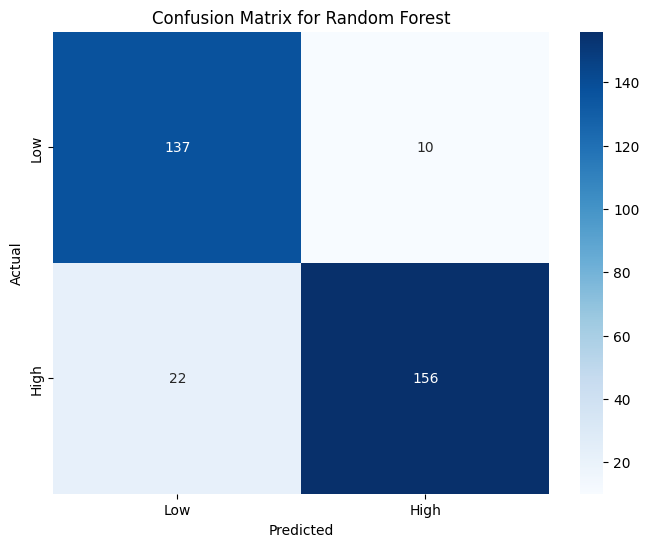


The final results have been saved in 'phase3_random_forest_results.csv'


In [4]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "phase2_results.csv"  # The file resulting from phase two
data = pd.read_csv(file_path)

# 1. Data Preprocessing
# Encoding the text column (gender)
if 'gender' in data.columns:
    le = LabelEncoder()
    data['gender_encoded'] = le.fit_transform(data['gender'])

# Select features and target
features = ['weekly_self_study_hours', 'absence_days', 'extracurricular_activities', 'gender_encoded'] + [
    'math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score'
]
target = 'average_score'

# Convert the target to classification: high performance or low performance
data['performance'] = data[target].apply(lambda x: 1 if x > 80 else 0)

X = data[features]
y = data['performance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add print statements for the data split percentages
print(f"Training data percentage: {len(X_train) / len(X) * 100:.2f}%")
print(f"Testing data percentage: {len(X_test) / len(X) * 100:.2f}%")

# Scale the numerical values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Build Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3. Model Evaluation
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")

# Add Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Low Performance', 'High Performance']))

# Improve Random Forest Model using Grid Search
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
gs_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
gs_rf.fit(X_train, y_train)
print("\nBest Parameters for Random Forest:", gs_rf.best_params_)

# Confusion Matrix for Random Forest Model
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save the results
data['predicted_performance_rf'] = rf_model.predict(scaler.transform(X))
output_path = "phase3_random_forest_results.csv"
data.to_csv(output_path, index=False)
print(f"\nThe final results have been saved in '{output_path}'")